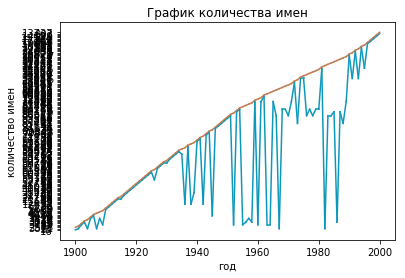

In [7]:
# задание 1
import matplotlib.pyplot as plt


def find_Xcoordinate(year, file_link):
    coordinates = [0, 0]
    years_link = file_link + 'yob' + str(year) + '.txt'
    with open(years_link, encoding="UTF-8") as f:
        for people in f:
            people = people.strip().split(',')
            if people[0] == 'Ruth':
                coordinates[0] = people[2]
            elif people[0] == 'Robert':
                coordinates[1] = people[2]
    return coordinates

if __name__ == '__main__':
    plt.xlabel('год')
    plt.ylabel('количество имен')
    plt.title('График количества имен')

    years_link = 'F:\\untitled\\years\\'  # у вас будет другой путь
    for year in range(1900, 2000, 1):
        x = find_Xcoordinate(year, years_link)
        y = find_Xcoordinate(year + 1, years_link)
        plt.plot((year, year + 1), (x[0], y[0]), color='#0d98ba')
        plt.plot((year, year + 1), (x[1], y[1]), color='#c27c51')
    
    plt.show()


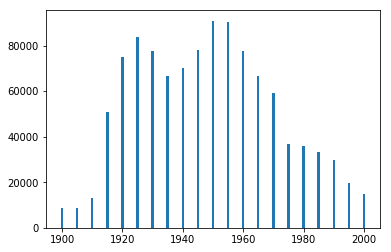

In [8]:
# задание 2
import matplotlib.pyplot as plt

bar_coordinate = {'x':[],
                  'y':[]}
for year in range(1900, 2001, 5):
    file_link = 'F:\\untitled\\years\\' # у вас будет другой путь
    file_link = file_link + 'yob' + str(year) + '.txt'
    name_quantity = 0
    with open(file_link, encoding='UTF-8') as f:
        for name in f:
            name = name.strip().split(',')
            if (name[0] == 'Ruth') or (name[0] == 'Robert'):
                name_quantity += int(name[2])
    bar_coordinate['y'].append(name_quantity)
    bar_coordinate['x'].append(year)

plt.bar(bar_coordinate['x'], bar_coordinate['y'])
plt.show()

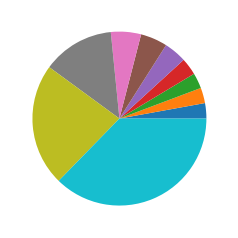

In [10]:
# задание 3
import matplotlib.pyplot as plt


file_link = 'F:\\untitled\\years\\yob1950.txt' # у вас будет другой путь

names_list = []
with open(file_link, encoding='UTF-8') as f:
    for name in f:
        name = name.strip().split(',')
        if name[0][0] == 'R':
            names_list.append(int(name[2]))

names_list = sorted(names_list)
plt.pie(names_list[-10:])
plt.show()

1900 год обработан
1901 год обработан


1902 год обработан
1903 год обработан
1904 год обработан


1905 год обработан
1906 год обработан
1907 год обработан


1908 год обработан
1909 год обработан


1910 год обработан
1911 год обработан


1912 год обработан
1913 год обработан


1914 год обработан


1915 год обработан


1916 год обработан


1917 год обработан


1918 год обработан


1919 год обработан


1920 год обработан


1921 год обработан


1922 год обработан


1923 год обработан


1924 год обработан


1925 год обработан


1926 год обработан


1927 год обработан


1928 год обработан


1929 год обработан


1930 год обработан


1931 год обработан


1932 год обработан


1933 год обработан


1934 год обработан


1935 год обработан


1936 год обработан


1937 год обработан


1938 год обработан


1939 год обработан


1940 год обработан


1941 год обработан


1942 год обработан


1943 год обработан


1944 год обработан


1945 год обработан


1946 год обработан


1947 год обработан


1948 год обработан


1949 год обработан


1950 год обработан


1951 год обработан


1952 год обработан


1953 год обработан


1954 год обработан


1955 год обработан


1956 год обработан


1957 год обработан


1958 год обработан


1959 год обработан


1960 год обработан


1961 год обработан


1962 год обработан


1963 год обработан


1964 год обработан


1965 год обработан


1966 год обработан


1967 год обработан


1968 год обработан


1969 год обработан


1970 год обработан


1971 год обработан


1972 год обработан


1973 год обработан


1974 год обработан


1975 год обработан


1976 год обработан


1977 год обработан


1978 год обработан


1979 год обработан


1980 год обработан


1981 год обработан


1982 год обработан


1983 год обработан


1984 год обработан


1985 год обработан


1986 год обработан


1987 год обработан


1988 год обработан


1989 год обработан


1990 год обработан


1991 год обработан


1992 год обработан


1993 год обработан


1994 год обработан


1995 год обработан


1996 год обработан


1997 год обработан


1998 год обработан


1999 год обработан


2000 год обработан


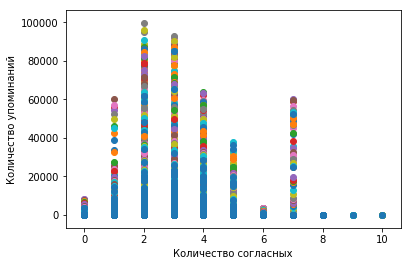

In [11]:
# номер 4
import matplotlib.pyplot as plt


plt.ylabel('Количество упоминаний')
plt.xlabel('Количество согласных')
consonants = 'bcdfghjklmnpqrstvwxyz'
for year in range(1900, 2001, 1):
    coordinates = {'x':[], 'y':[]}
    file_link = 'F:\\untitled\\years\\' # у вас будет другой путь
    file_link = file_link + 'yob' + str(year) + '.txt'
    with open(file_link, encoding='UTF-8') as f:
        for people in f:
            people = people.strip().split(',')
            consonants_quantity = 0
            for name in people[0]:
                if name in consonants:
                    consonants_quantity += 1
            coordinates['x'].append(consonants_quantity)
            coordinates['y'].append(int(people[2]))
    print(year, 'год обработан')
    plt.scatter(coordinates['x'], coordinates['y'])
plt.show()